<a href="https://colab.research.google.com/github/bam396/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 5 Coding: The relationship between concentration of homeless shelters and count of 311 requests related to homeless services

**Problem Statement**: Homelesses is a big concern in New York City. The Department of Homeless Services is tasked with providing services and housing for people who are homeless. They recently began publishing the count of homeless shelter buildings per community district on NYC Open Data to provide more transparency into where shelters are located. The dataset provides counts in multiple columns for different categories of buildings. It also includes counts from different reporting dates.

The 311 Service Requests dataset includes a complaint type called "Homeless Person Assistance". Let's find out if there's a relationship between the number of homeless assistance 311 requests and the concentration of homeless shelter buildings per community district.

**Step 1.** Load the datasets:

*   Cleaned 311 data that excludes records with invalid community districts. Shared with you on Google Drive as cleaned_311_data_revised.csv
*   NYC Open dataset that provides the total count of different types of homeless shelter buildings per community district.

 * Data source page where you can preview the data: https://data.cityofnewyork.us/Social-Services/Buildings-by-Borough-and-Community-District/3qem-6v3v/data

  *   CSV data download link you can plug into the pd.read_csv() function: https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD


In [0]:
import pandas as pd
from google.colab import drive

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
requests = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
shelter = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD')



---

**Step 2.** Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'


In [7]:
shelter.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [8]:
shelter.rename(columns = {'Report Date': 'report_date', 'Borough':'borough', 'Community District': 'community_district', 'Adult Family Comm Hotel':'adult_family_comm_hotel', 'Adult Family Shelter':'adult_family_shelter', 'Adult Shelter':'adult_shelter', 'Adult Shelter Comm Hotel':'adult_shelter_comm_hotel', 'FWC Cluster':'fwc_cluster', 'FWC Comm Hotel':'fwc_comm_hotel', 'FWC Shelter':'fwc_shelter'}, inplace = True)

shelter.head()

,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [9]:
shelter_date = shelter[shelter.report_date == "09/30/2019"]

shelter_date.head()

,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0


**Step 3.** Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

* Tip: There are multiple ways to add these columns together. With one approach, you may find that your total column contains NaN values. This is because many of the columns contains NaN/empty values. When you add a real number to a NaN, the sum will be NaN. To get around this, you will need to fill in all the NaN values with 0 instead. Use the .fillna(0) method on your shelter count dataframe.

In [0]:
shelter_date = shelter_date.fillna(0)

In [11]:
shelter_date.head()

,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0


In [12]:
shelter_sum = list(shelter_date)
shelter_sum.remove('report_date')
shelter_sum.remove('borough')
shelter_sum.remove('community_district')

# checking code
print(shelter_sum)

['adult_family_comm_hotel', 'adult_family_shelter', 'adult_shelter', 'adult_shelter_comm_hotel', 'fwc_cluster', 'fwc_comm_hotel', 'fwc_shelter']


In [13]:
shelter_date['sums'] = shelter_date['adult_family_comm_hotel'] + shelter_date['adult_family_shelter'] + shelter_date['adult_shelter'] + shelter_date['adult_shelter_comm_hotel'] + shelter_date['fwc_cluster'] + shelter_date['fwc_shelter']

shelter_date.head()

,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,sums
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,14.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,21.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0


**Step 4.** From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

In [14]:
requests.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [15]:
homeless_requests = requests[requests.complaint_type == "Homeless Person Assistance"]

homeless_requests.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0
371,394,394,39888951,08/01/2018 04:10:47 AM,08/01/2018 05:18:59 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:10:47 AM,The individual was found and outreach assistan...,08/01/2018 05:18:59 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0


**Step 5.** Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [16]:
homeless_requests_cd = homeless_requests.groupby('borocd').size().reset_index(name='count_of_homeless_requests')

# checking code, as always
homeless_requests_cd.head()

,borocd,count_of_homeless_requests
0,101.0,758
1,102.0,965
2,103.0,520
3,104.0,1055
4,105.0,3020


**Step 6.** Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).

* Tip: Not all community districts have homeless facilities in them. Use a left join with the 311 complaints as the left table and shelter counts as the right table. After doing this, you should fill in the new NaNs with zeros using the .fillna(0) method on your dataframe.

In [17]:
homeless_requests_cd['borocd'] = homeless_requests_cd['borocd'].astype(int)
homeless_requests_cd.head()

,borocd,count_of_homeless_requests
0,101,758
1,102,965
2,103,520
3,104,1055
4,105,3020


In [18]:
shelter_date['community_district'] = shelter_date['community_district'].astype(int)
shelter_date.head()

,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,sums
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,14.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,21.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0


In [19]:
merged = pd.merge(left=homeless_requests_cd, right=shelter_date, left_on='borocd', right_on='community_district')
#checking code
merged.head()

,borocd,count_of_homeless_requests,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,sums
0,101,758,09/30/2019,Manhattan,101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,103,520,09/30/2019,Manhattan,103,0.0,0.0,7.0,2.0,3.0,2.0,3.0,15.0
2,104,1055,09/30/2019,Manhattan,104,0.0,1.0,3.0,0.0,0.0,4.0,0.0,4.0
3,105,3020,09/30/2019,Manhattan,105,0.0,1.0,0.0,0.0,0.0,8.0,1.0,2.0
4,106,753,09/30/2019,Manhattan,106,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0


**Step 7.** Produce a scatter plot of the data using the matplotlib package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

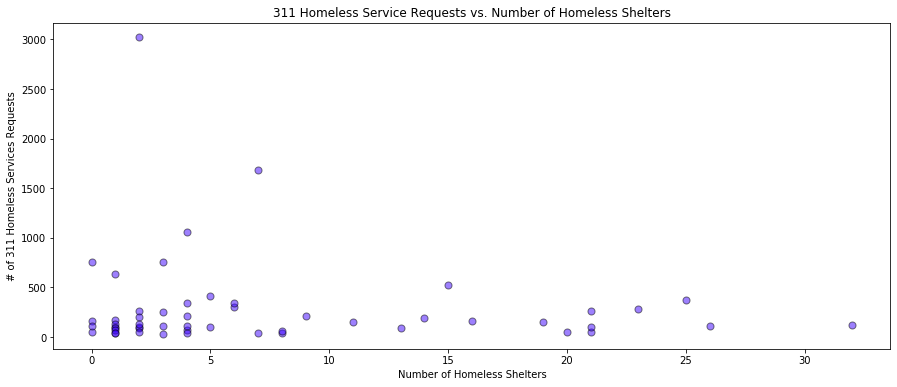

In [20]:
# create an array of x values for the lines of best fit

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged.sums), # x
    np.array(merged.count_of_homeless_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque


plt.title('311 Homeless Service Requests vs. Number of Homeless Shelters')
plt.xlabel('Number of Homeless Shelters')
plt.ylabel('# of 311 Homeless Services Requests')


plt.show()

**Step 8.** Use np.corrcoef(x, y) to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [21]:
x = np.array(merged.sums)
y = np.array(merged.count_of_homeless_requests)

np.corrcoef(x, y)

array([[ 1.        , -0.10933447],
       [-0.10933447,  1.        ]])

**Step 9.** Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [0]:
# importing statsmodel
import statsmodels.api as sm # package for doing statistics

In [23]:
# y = dependent variable (# of homeless requests)
y = np.array(merged.count_of_homeless_requests)

# x = independent variable (shelters) with a constant added
x = np.array(merged.sums)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit() 

print(model.summary())

[[ 1.  0.]
 [ 1. 15.]
 [ 1.  4.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  7.]
 [ 1.  1.]
 [ 1.  6.]
 [ 1. 23.]
 [ 1. 25.]
 [ 1.  2.]
 [ 1. 14.]
 [ 1.  8.]
 [ 1. 21.]
 [ 1. 32.]
 [ 1. 21.]
 [ 1. 26.]
 [ 1. 13.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1. 21.]
 [ 1.  9.]
 [ 1. 16.]
 [ 1.  4.]
 [ 1.  4.]
 [ 1. 11.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. 20.]
 [ 1.  4.]
 [ 1.  3.]
 [ 1.  3.]
 [ 1.  2.]
 [ 1.  5.]
 [ 1.  2.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1. 19.]
 [ 1.  7.]
 [ 1.  2.]
 [ 1.  1.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6049
Date:                Fri, 22 Nov 2019   Prob (F-statistic):              0.440
Time:                        19:

**Step 10**. Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

In [24]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

# let's make labels for the lines of the best fit to use on a scatter plot
# str(round(p[1],2)) THE 2 ROUNDS TO TWO DECIMAL PLACES

label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)


parameters: [336.89168616  -6.40496889]
R2: 0.011954027114595589
y = -6.4x + 336.89; R2 = 0.012


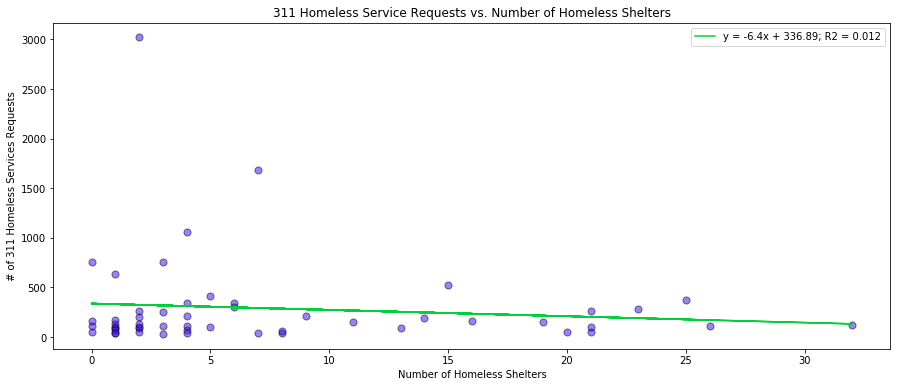

In [25]:

# create an array of x values for the lines of best fit

x_line = np.array(merged.sums)

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged.sums), # x
    np.array(merged.count_of_homeless_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.plot(
    x_line, 
    p[0] + p[1] * x_line,
    c='#00d138', # lighter green
    label=label)

plt.title('311 Homeless Service Requests vs. Number of Homeless Shelters')
plt.xlabel('Number of Homeless Shelters')
plt.ylabel('# of 311 Homeless Services Requests')
plt.legend()

plt.show()

**Step 11:** Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

**Additional context on 311 use cases related to homeless services:**

* What do "Homeless Person Assistance" requests actually entail? https://www1.nyc.gov/site/dhs/outreach/street-outreach.page
* 311 web page encouraging residents of shelters to complain about unsuitable conditions. Unfortunately those complaints are not clearly labeled in the 311 data. https://portal.311.nyc.gov/article/?kanumber=KA-01039
* News article referencing conditions in shelters and residents reporting problems through 311. https://www.nydailynews.com/new-york/nyc-homeless-shelter-residents-call-311-no-listening-article-1.2759222

# Answer:

The fact that the relationship between the number of homeless shelters and the number of homeless services request calls is negative means that, all else constant, the number of calls decreases. This makes logical sense because homeless shelters are meant to provide shelter to the homeless - if there are not enough facilties in a district, then more individuals are likely to stay out on the streets.

However, the R2 value tells me that this relationship isn't very strong, specifically that only 1.2% of this relationship is explained by the model. The links that Professor Kates provided suggest that, while the number of calls to 311 made to report homeless individuals may decrease, the number of calls made by homeless individuals residing in shelters may increase as utilization increases.